# Exploratory Data Analysis (EDA)
Adapted from https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec

**Outline**
* Dataset overview
* Univariate Analysis
 * Bar plot
 * Histogram and Boxplot
* Multivariate Analysis
 * Categorical vs numerical
   * Density plot
   * Bins
   * Box plot
   * Pairs plot
   * Bar plot
   * One-way ANOVA
 * Categorical vs categorical
   * Count plot
   * Heatmap
   * Chi-Square test and Cramer’s V
 * Numerical vs numerical
   * Scatter plot
* Correlation Analysis
* Exercise

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
## for data
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
import pandas as pd
import numpy as np

## for plotting
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install statsmodels
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Dataset and its overall characteristics 
**Titanic dataset from Kaggle**

For the details see: https://www.kaggle.com/competitions/titanic/data

In [5]:
url = url = 'https://raw.githubusercontent.com/ZIFODS/Training/master/data/data_titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA task "Dataset overview"**: how many categorical and numerical variables there are and the proportion of missing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Function excludes the character columns and given summary about numeric columns.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,714
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,6
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,young
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,309
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [5]:
# To show number of nulls (Not available data points or NAs) in the dataset
missing = df.isnull().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Code from https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param df: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

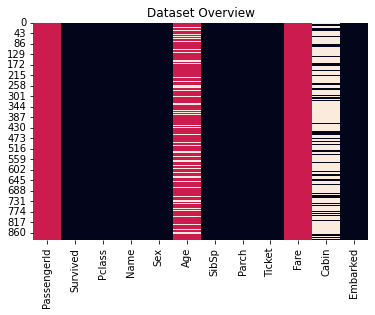

 Categerocial   Numeric   NaN 


In [7]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

There are 891 rows and 12 columns:

* each row of the table represents a specific passenger (or observation) identified by PassengerId, 
* Survived is the phenomenon that we want to understand and predict (or target variable), It contains two classes: 1 if the passenger survived and 0 otherwise, therefore this use case is **a binary classification problem**.
* Age and Fare are numerical variables while the others are categorical.
* Only Age and Cabin contain missing data.

In [8]:
# Column PassengerId is a unique passenger identificator and can be used as an index.
df = df.set_index("PassengerId")

## Univariate Analysis - One variable analysis
### Bar plot
A bar plot is appropriate to understand labels frequency for a single categorical variable.

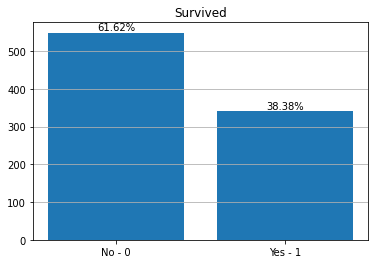

In [9]:
graph = plt.bar(["No - 0","Yes - 1"],df["Survived"].value_counts())
plt.title("Survived")
plt.grid(axis="y")

# Add percentages to the bars
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df["Survived"].value_counts(normalize=True).mul(100)[i],2))+'%',
             ha='center')
    i+=1
    
plt.show()

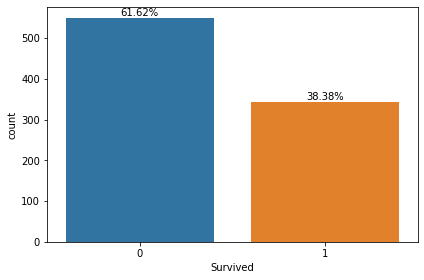

In [10]:
# Simiar barplot (called countplot) by using seaborn library:
ax = sns.countplot(x="Survived", data=df)

# Add percentage
total = sum(df["Survived"].value_counts())
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

342 passengers survived and 549 didn’t, in other words the survival rate (or the population mean) is 38%.

In [11]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Histogram and Boxplot
A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data.
A boxplot is used to show locality, spread and skewness groups of numerical data.

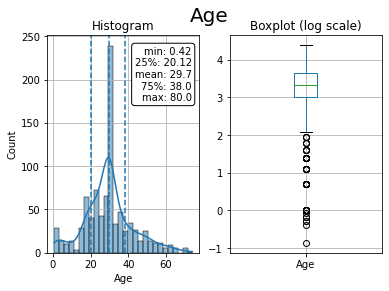

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle("Age", fontsize=20)

### Histogram
ax[0].title.set_text('Histogram')
# Fill missing values with average age
variable = df["Age"].fillna(df["Age"].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.histplot(variable, kde=True, ax=ax[0])
des = df["Age"].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### Boxplot to show outliers
ax[1].title.set_text('Boxplot (log scale)')
tmp_df = pd.DataFrame(df["Age"])
tmp_df["Age"] = np.log(tmp_df["Age"])
tmp_df.boxplot(column="Age", ax=ax[1])
plt.show()

The passengers were, on average, pretty young: the distribution is skewed towards the left side (the mean is 29.7 years old and the 75th percentile is 38 years old). Coupled with the outliers in the box plot, the first spike in the left tail says that there was a significant amount of children.

In [13]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Age'], bins=[0,1,4,16,30,60,100], labels=["baby","toddler","child","young","middle_aged","old"])
    return df

# Call function
df = get_num_people_by_age_category(df)

In [14]:
df["age_group"].value_counts()

young          309
middle_aged    283
child           60
toddler         26
old             22
baby            14
Name: age_group, dtype: int64

## Multivariate Analysis -  the simultaneous analysis of more than one outcome variable
### Categorical vs numerical

* split the population (the whole set of observations) into 2 groups: Survived=1 and Survived=0 (Not Survived).
* plot and compare densities of the two groups, if the distributions are different then the variable is predictive because the two groups have different patterns.
* group the numerical variable (Age) in bins (subgroups) and plot the composition of each bin, if the proportion of 1s is similar in all of them then the variable is not predictive.
* plot and compare the box plots of the two groups to spot different behaviors of the outliers.

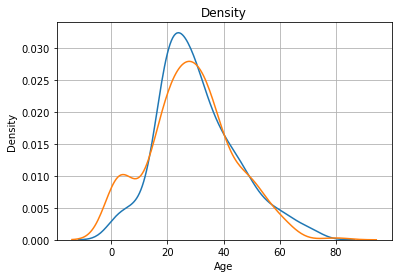

In [15]:
cat, num = "Survived", "Age"

# Plot and compare densities of the two groups
for i in df[cat].unique():
    # A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
    # analagous to a histogram. 
    # KDE represents the data using a continuous probability density curve in one or more dimensions.
    sns.kdeplot(df[df[cat]==i][num], label=i)
plt.title('Density')
plt.grid(True)
plt.show()

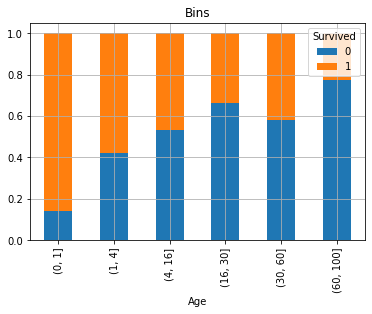

In [16]:
# Group the numerical variable (Age) in bins (subgroups) and plot the composition of each bin
variable = df["Age"].fillna(df["Age"].mean())
breaks = [0,1,4,16,30,60,100]
#breaks = np.quantile(variable, q=np.linspace(0, 1, 11)) 
tmp = df.groupby([cat, pd.cut(variable, breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=True, grid=True)
plt.title('Bins')
plt.show()

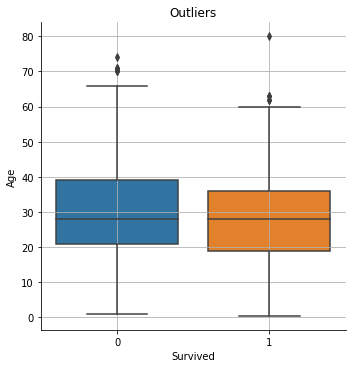

In [17]:
# Boxplot   
sns.catplot(x=cat, y=num, data=df, kind="box")
plt.title('Outliers')
plt.grid(True)
plt.show()

These 3 plots are just different perspectives of the conclusion that Age is predictive. The survival rate is higher for younger passengers: there is a spike in the left tail of 1s distribution and the first bin (0–16 y.o.) contains the highest percentage of survived passengers.

## Other plots
* A **pairs plot** is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.
* A **bar plot** represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

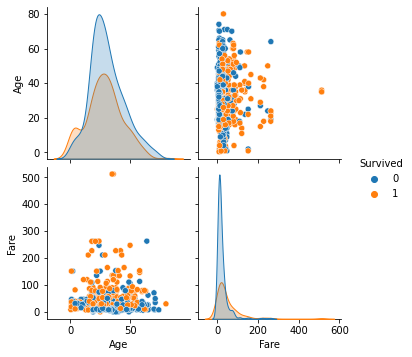

In [19]:
# Here we are looking at two numerical variables "Age" and "Fare",
# and their relationship with categorical target variable "Survived" that is used for color (parameter "hue").
sns.pairplot(df[['Age','Fare','Survived']], hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

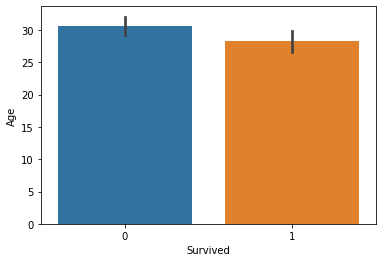

In [20]:
sns.barplot(x=cat, y=num, data=df)

Barplot for Age and Survived - on average people who survived are slightly younger.

## One-way ANOVA

When not convinced by the “eye intuition”, you can always resort to good old statistics and run a test. In this case of categorical (Survived) vs numerical (Age), use a one-way ANOVA test. Basically, it tests whether the means of two or more independent samples are significantly different, so if the p-value is small enough (<0.05) the null hypothesis of samples means equality can be rejected.

In [18]:
model = smf.ols(num+' ~ '+cat, data=df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.039)


### Categorical vs Categorical
* A count plot can be thought of as a histogram across a categorical, instead of quantitative variable
* A heatmap plots rectangular data as a color-encoded matrix.

<AxesSubplot:xlabel='Sex', ylabel='count'>

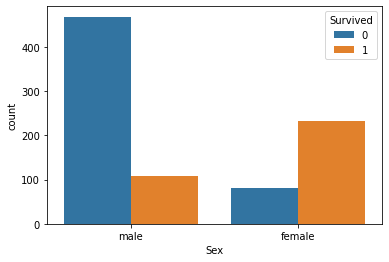

In [21]:
sns.countplot(x='Sex', hue=cat, data=df)

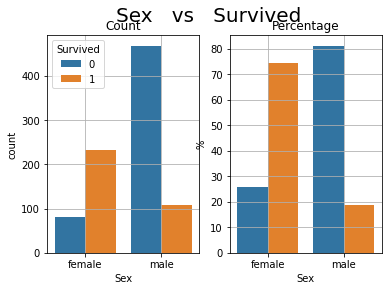

In [22]:
x, y = "Sex", "Survived"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### Count
ax[0].title.set_text('Count')
order = df.groupby(x)[y].count().index.tolist()
sns.countplot(x=x, hue=y, data=df, order=order, ax=ax[0])
ax[0].grid(True)


### Percentage
ax[1].title.set_text('Percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y],as_index=False)[y].count()
b = b.rename(columns={y:"count"}).reset_index()
b = b.merge(a, how="left")
b["Survived"] = [0,1,0,1] 
b["%"] = b["count"] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()


More than 200 female passengers (75% of the total amount of women onboard) and about 100 male passengers (less than 20%) survived. To put it another way, among women the survival rate is 75% and among men is 20%, therefore Sex is predictive. Moreover, this confirms that they gave priority to women and children.

Age and Sex are examples of predictive features, but not all of the columns in the dataset are like that. For instance, Cabin seems to be a useless variable as it doesn’t provide any useful information, there are too many missing values and categories.

This kind of analysis should be carried on for each variable in the dataset to decide what should be kept as a potential feature and what can be dropped because not predictive.

Text(0.5, 1.0, 'Age group vs Pclass (filter: Survived)')

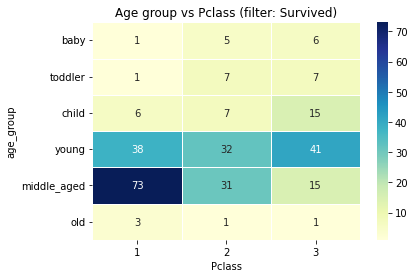

In [24]:
## Plot contingency table
cont_table = pd.crosstab(index=df["age_group"], 
             columns=df["Pclass"], values=df["Survived"]==1, aggfunc="sum")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Age group vs Pclass (filter: Survived)' )

## Chi-Square test and Cramer’s V 
To test the correlation of these 2 categorical variables we use a **Chi-Square test**: assuming that two variables are independent (null hypothesis), it tests whether the values of the contingency table for these variables are uniformly distributed. 

If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent. 

It’s possible to calculate **Cramer’s V**  that is a measure of correlation that follows from this test, which is symmetrical (like traditional Pearson’s correlation) and ranges between 0 and 1 (unlike traditional Pearson’s correlation there are no negative values).

In [23]:
cont_table = pd.crosstab(index=df[x], columns=df[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.54 Significant (p-value:0.0)


### Numerical (Fare) vs numerical (Age)
* A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

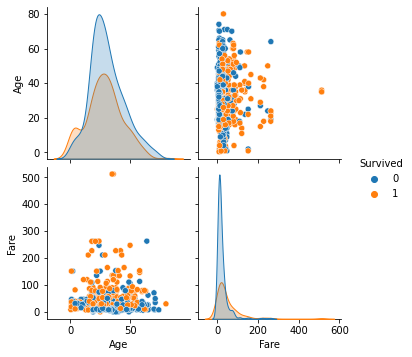

In [25]:
sns.pairplot(df[['Age','Fare','Survived']], hue='Survived')

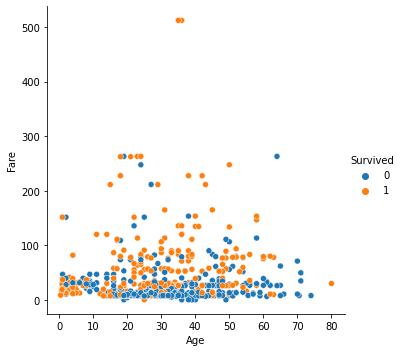

In [26]:
sns.relplot(x="Age", y="Fare", hue="Survived", data=df);

# Correlation Analysis

In [28]:
df.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Exercise

1. Find and load the "iris" dataset.
2. How many numerical and categorical variables are in the dataset?
3. What is the most obvious target variable?
4. How many missing values are in each column?
5. Visualize all the columns' relationships using pair plots.
6. Which target class has a large difference in its characteristics compared to the other classes?